## Q4

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
 
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
# from Utils import *
# from Templates import *
from torch.utils.data import Dataset, DataLoader
 
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 
import os
path = os.getcwd() + '/drive/MyDrive/ComputerVision/Assignment_3/'
 
!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Templates.py .
!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Utils.py .
 
from Utils import *
from Templates import *

In [3]:
trainset = DataAugment3(path + 'dataset/',train= True)
train_loader = DataLoader(trainset, batch_size = 16, shuffle = True,num_workers = 2)
 
testset = DataAugment3(path + 'dataset/',train= False)
test_loader = DataLoader(testset, batch_size = 64, shuffle = True,num_workers = 2)

In [4]:
epochs = 10
lr = 1e-4
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 1
trained = True
# path = './Models/'
save = False
 
net = Model(out_ch = 11).to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 
 
train_losses = []
train_loss = 0
 
if trained:
    d = torch.load(path+'Models/q4.pth',map_location=torch.device('cpu'))
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])
device

device(type='cpu')

In [ ]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        seg_mask = data['seg_mask'].to(device)

        optimizer.zero_grad()
        output = net(inpt)      
        
        loss =  criterion(output,seg_mask)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx / len(train_loader), loss.item()))
            if save : 
                d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
                torch.save(d,path + 'Models/q4.pth')
                
        
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)

In [ ]:
with torch.no_grad():
    idx, data = next(enumerate(test_loader))
    output = torch.exp(net(data['x'].to(device)).cpu())
    predicted = output.detach().argmax(dim = 1).numpy()
    labels = data['seg_mask']

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()
/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


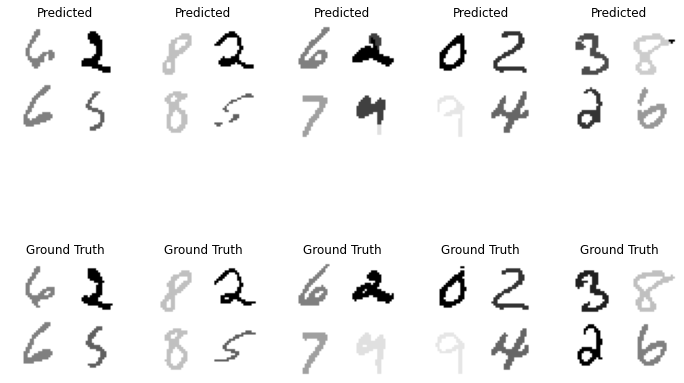

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams["figure.edgecolor"] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
for j in range(5):
    plt.subplot(2,5,j+1)
    plt.axis('off')
    plt.title("Predicted")
    plt.imshow(predicted[j],cmap = plt.cm.gray)
 
    plt.subplot(2,5,6+ j)
    plt.axis('off')
    plt.title("Ground Truth")
    plt.imshow(labels[j],cmap = plt.cm.gray)

In [5]:
JSim3(net,test_loader,device)

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()
/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()


0/157


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


1/157
2/157
3/157
4/157
5/157
6/157
7/157
8/157
9/157
10/157
11/157
12/157
13/157
14/157
15/157
16/157
17/157
18/157
19/157
20/157
21/157
22/157
23/157
24/157
25/157
26/157
27/157
28/157
29/157
30/157
31/157
32/157
33/157
34/157
35/157
36/157
37/157
38/157
39/157
40/157
41/157
42/157
43/157
44/157
45/157
46/157
47/157
48/157
49/157
50/157
51/157
52/157
53/157
54/157
55/157
56/157
57/157
58/157
59/157
60/157
61/157
62/157
63/157
64/157
65/157
66/157
67/157
68/157
69/157
70/157
71/157
72/157
73/157
74/157
75/157
76/157
77/157
78/157
79/157
80/157
81/157
82/157
83/157
84/157
85/157
86/157
87/157
88/157
89/157
90/157
91/157
92/157
93/157
94/157
95/157
96/157
97/157
98/157
99/157
100/157
101/157
102/157
103/157
104/157
105/157
106/157
107/157
108/157
109/157
110/157
111/157
112/157
113/157
114/157
115/157
116/157
117/157
118/157
119/157
120/157
121/157
122/157
123/157
124/157
125/157
126/157
127/157
128/157
129/157
130/157
131/157
132/157
133/157
134/157
135/157
136/157
137/157
138/157
139/

masked

[]